In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [3]:
df=pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
df2=df.drop(["No","X5 latitude","X6 longitude"],axis=1)

In [17]:
df2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [21]:
df2['X1 transaction date'] = pd.to_datetime(df2['X1 transaction date']).dt.year

In [27]:
df2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,1970,32.0,84.87882,10,37.9
1,1970,19.5,306.59470,9,42.2
2,1970,13.3,561.98450,5,47.3
3,1970,13.3,561.98450,5,54.8
4,1970,5.0,390.56840,5,43.1


In [41]:
x=df2.drop(["Y house price of unit area"],axis=1)
y=df2["Y house price of unit area"]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [73]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [75]:
predt=lr.predict(xtest)

In [77]:
lr.score(xtrain,ytrain)#train score

0.5354994950916503

In [79]:
lr.score(xtest,ytest)#test score

0.5480002720789096

In [85]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
mse=mean_squared_error(ytest,predt)
r2=r2_score(ytest,predt)

In [95]:
print(f"the MSE value is {mse}")
print(f"the r2_score value is {r2}")

the MSE value is 75.58570700589274
the r2_score value is 0.5480002720789096


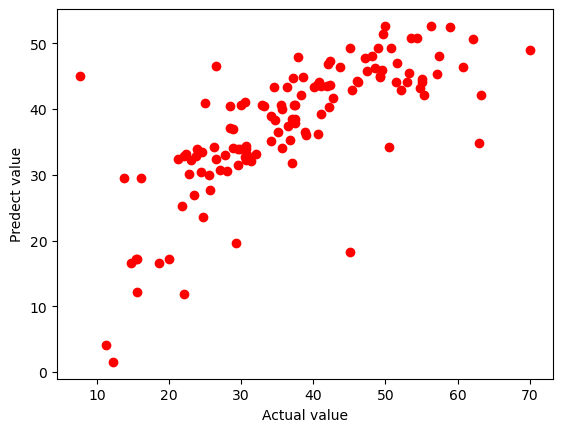

In [299]:
plt.scatter(ytest,predt,color="r")
plt.xlabel("Actual value")
plt.ylabel("Predect value")
plt.show()

# **polynominal**

In [222]:
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(xtrain)
x_test_poly=poly.transform(xtest)

In [224]:
lr.fit(x_train_poly,ytrain)

LinearRegression()

In [226]:
poly_predt=lr.predict(x_test_poly)

In [228]:
lr.score(x_train_poly,ytrain)#train score

0.6313861463069118

In [230]:
lr.score(x_test_poly,ytest)#test score

0.6300766838218481

In [232]:
poly_mse=mean_squared_error(ytest,poly_predt)
poly_r2=r2_score(ytest,poly_predt)

In [234]:
print(f"the POLY_MSE value is {poly_mse}")
print(f"the POLY_r2_score value is {poly_r2}")

the POLY_MSE value is 61.86046951818387
the POLY_r2_score value is 0.6300766838218481


## **make pipeline**

In [240]:
pipeline=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [244]:
pipeline_predt=pipeline.predict(xtest)

In [246]:
pipeline.score(xtest,ytest)

0.6300766838218481

In [260]:
pipeline.predict([[1970,	20.3	,287.60250	,6]])

C:\Users\Dream\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([41.84740975])